## Data Formatting 


In [1]:
import pandas as pd

In [2]:
#loading sample data
df= pd.read_csv('355c81d4-9417-41bd-8ed0-f3eccfbac975_unknown_2022-07-06T11_43_18.802+04_00_With_Model.csv')

#Loading full data
df_2020_2021= pd.read_excel('Jan-2020 - Dec-2021.xlsx')
df_2022_2023= pd.read_excel('Jan-2022 - Jun-2023.xlsx')


print(df.shape)
print(df_2020_2021.shape)
print(df_2022_2023.shape)

(20638, 22)
(40205, 23)
(1249, 21)


In [3]:
df_2020_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40205 entries, 0 to 40204
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Start Time              40205 non-null  object 
 1   End Time                40205 non-null  object 
 2   Campaign Id             40205 non-null  object 
 3   Campaign Name           40205 non-null  object 
 4   Ad Set Id               40205 non-null  object 
 5   Ad Set Name             40205 non-null  object 
 6   Ad Set Active Status    40205 non-null  object 
 7   Ad Set Daily Budget     7310 non-null   float64
 8   Ad Set Lifetime Budget  32895 non-null  float64
 9   Ad Set Goal             40205 non-null  object 
 10  Ad Set Bid              40205 non-null  object 
 11  Amount Spent            40205 non-null  float64
 12  Result                  40205 non-null  int64  
 13  Result Type             40205 non-null  object 
 14  Cost Per Result         40205 non-null

In [4]:
df.describe()

,Amount Spent,Paid Impressions,Swipe Ups,Paid Reach,Swipe Up Rate,2 Second Video Views,Video Plays at 25%,Video Plays at 50%,Video Plays at 75%,Video Completions
count,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000
mean,3.469289,1131.482363,8.000291,743.740673,0.000509,242.421359,137.340295,58.641923,39.661256,30.577188
std,22.959283,7440.491709,57.682678,4941.359514,0.002757,2023.149534,901.164539,380.579834,260.605339,202.565917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,639.350000,238111.000000,1733.000000,159255.000000,0.041900,67459.000000,18117.000000,8882.000000,6274.000000,4816.000000


In [5]:
#Format the dates consistently for sample dataset
date=[]
for d in df['Start Time']:
    d=d.split(' ')[0]
    date.append(d)

df['date']=date
df=df.drop(columns=['Start Time', 'End Time'])
df['date'] = df['date'].astype('datetime64[ns]')
df.dtypes





Campaign Id                     object
Campaign Name                   object
Ad Set Id                       object
Ad Set Name                     object
Creative Id                     object
Ad Id                           object
Ad Name                         object
Ad Active Status                object
Ad Type                         object
Amount Spent                   float64
Paid Impressions                 int64
Swipe Ups                        int64
Paid Reach                       int64
Swipe Up Rate                  float64
2 Second Video Views             int64
Video Plays at 25%               int64
Video Plays at 50%               int64
Video Plays at 75%               int64
Video Completions                int64
Model                           object
date                    datetime64[ns]
dtype: object

In [6]:
#Format the dates consistently for total dataset
date=[]
for d in df_2020_2021['Start Time']:
    d=d.split(' ')[0]
    date.append(d)

df_2020_2021['date']=date
df_2020_2021=df_2020_2021.drop(columns=['Start Time'])
df_2020_2021['date'] = df_2020_2021['date'].astype('datetime64[ns]')
df_2020_2021.dtypes


End Time                          object
Campaign Id                       object
Campaign Name                     object
Ad Set Id                         object
Ad Set Name                       object
Ad Set Active Status              object
Ad Set Daily Budget              float64
Ad Set Lifetime Budget           float64
Ad Set Goal                       object
Ad Set Bid                        object
Amount Spent                     float64
Result                             int64
Result Type                       object
Cost Per Result                  float64
Cost Per Result Type              object
Paid Impressions                   int64
Paid eCPM                        float64
Swipe Ups                          int64
eCPSU                            float64
App Installs                       int64
eCPI                               int64
App Install Rate                   int64
date                      datetime64[ns]
dtype: object

In [7]:
date=[]
for d in df_2022_2023['Start Time']:
    d=d.split(' ')[0]
    date.append(d)

df_2022_2023['date']=date
df_2022_2023=df_2022_2023.drop(columns=['Start Time'])
df_2022_2023['date'] = df_2022_2023['date'].astype('datetime64[ns]')
df_2022_2023.dtypes

End Time                        object
Campaign Id                     object
Campaign Name                   object
Ad Set Id                       object
Ad Set Name                     object
Creative Id                     object
Ad Id                           object
Ad Name                         object
Ad Active Status                object
Ad Type                         object
Amount Spent                   float64
Paid Impressions                 int64
Swipe Ups                        int64
Paid Reach                       int64
Swipe Up Rate                  float64
2 Second Video Views             int64
Video Plays at 25%               int64
Video Plays at 50%               int64
Video Plays at 75%               int64
Video Completions                int64
date                    datetime64[ns]
dtype: object

In [8]:
#phase extraction: sample
phase=[]

for campaign_name in df['Campaign Name']:
    if 'AWRN' in campaign_name:
        phase.append('Awareness')
    elif "CONS" in campaign_name:
        phase.append('Consideration')
    elif 'PRCH' in campaign_name or 'Decision' in campaign_name:
        phase.append('Decision')
    else:
        phase.append(None)

df['phase']=phase

df['phase'].value_counts()


Consideration    13432
Awareness         7206
Name: phase, dtype: int64

In [9]:
#phase extraction: 2020-2021 data

phase=[]

for index, row in df_2020_2021.iterrows():
    if ('AWRN' in row['Campaign Name']) : 
        phase.append('Awareness')
    elif ('CONS' in row['Campaign Name']) : 
        phase.append('Consideration')
    elif ('PRCH' in row['Campaign Name']) : 
        phase.append('Decision')
    elif (row['Ad Set Goal']=='15 Second Video View') : 
        phase.append('Awareness')
    elif (row['Ad Set Goal']=='2 Second Video Views') : 
        phase.append('Awareness')
    elif (row['Ad Set Goal']=='Impressions') : 
        phase.append('Awareness')
    elif (row['Ad Set Goal']=='Pixel Page View') : 
        phase.append('Consideration')
    elif (row['Ad Set Goal']=='Story Opens') : 
        phase.append('Consideration')
    elif (row['Ad Set Goal']=='Swipe Ups') : 
        phase.append('Consideration')
    elif ('VIEWS' in row['Ad Set Name']) : 
        phase.append('Awareness')
    elif ('CPM' in row['Ad Set Name']) : 
        phase.append('Awareness')
    elif ('TRAFF' in row['Ad Set Name']) : 
        phase.append('Consideration')
    else: 
        phase.append(None)

df_2020_2021['phase']=phase

df_2020_2021['phase'].value_counts() 


Awareness        21199
Consideration    14620
Decision          4386
Name: phase, dtype: int64

In [10]:
df_2020_2021.shape

(40205, 24)

In [11]:
#phase extraction: 2020-2021 data

phase=[]

for index, row in df_2022_2023.iterrows():
    if ('AWRN' in row['Campaign Name']) : 
        phase.append('Awareness')
    elif ('CONS' in row['Campaign Name']) : 
        phase.append('Consideration')
    elif ('PRCH' in row['Campaign Name']) : 
        phase.append('Decision')
    elif ('VIEWS' in row['Ad Set Name']) : 
        phase.append('Awareness')
    elif ('AWRN' in row['Ad Set Name']) : 
        phase.append('Awareness')
    elif ('TRAFF' in row['Ad Set Name']) : 
        phase.append('Consideration')
    elif (row['Ad Type'] == 'Top Snap Only'):
        phase.append('Awareness')
    else: 
        phase.append('Unknown')

df_2022_2023['phase']=phase

df_2022_2023['phase'].value_counts() 


Consideration    679
Awareness        570
Name: phase, dtype: int64

In [12]:
df_2022_2023.shape

(1249, 22)

In [13]:
df_concat = pd.concat([df_2020_2021, 
                df_2022_2023
                ], ignore_index=True)
df_concat.shape

(41454, 36)

In [14]:
df_concat.columns

Index(['End Time', 'Campaign Id', 'Campaign Name', 'Ad Set Id', 'Ad Set Name',
       'Ad Set Active Status', 'Ad Set Daily Budget', 'Ad Set Lifetime Budget',
       'Ad Set Goal', 'Ad Set Bid', 'Amount Spent', 'Result', 'Result Type',
       'Cost Per Result', 'Cost Per Result Type', 'Paid Impressions',
       'Paid eCPM', 'Swipe Ups', 'eCPSU', 'App Installs', 'eCPI',
       'App Install Rate', 'date', 'phase', 'Creative Id', 'Ad Id', 'Ad Name',
       'Ad Active Status', 'Ad Type', 'Paid Reach', 'Swipe Up Rate',
       '2 Second Video Views', 'Video Plays at 25%', 'Video Plays at 50%',
       'Video Plays at 75%', 'Video Completions'],
      dtype='object')

In [17]:
df_concat=df_concat[['Amount Spent', 'Paid Impressions', 'Swipe Ups', 'date', 'phase']]

mask_1 = df_concat['Paid Impressions'] < df_concat['Swipe Ups']
df_concat= df_concat[~mask_1]
mask_2 = (df_concat['Amount Spent'] == 0) & (df_concat['Paid Impressions'] > 0)
df_concat= df_concat[~mask_2]

df_concat.reset_index(drop=True, inplace=True)
df_concat.shape



(41450, 5)

## Simple plotting of data

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

1.1 Spending analysis on sample data

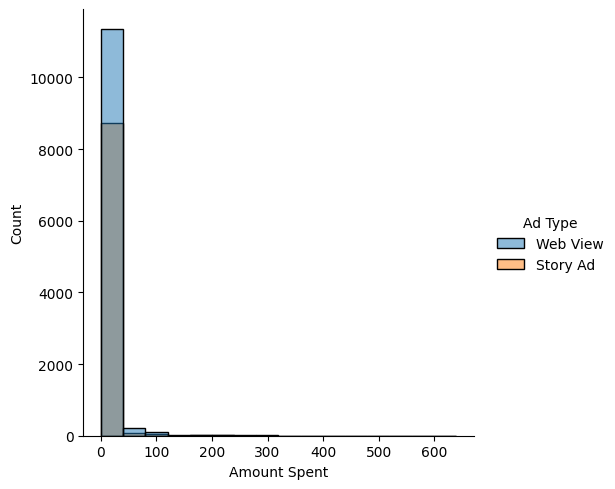

In [19]:
sns.displot(x=df['Amount Spent'], hue= df['Ad Type'])

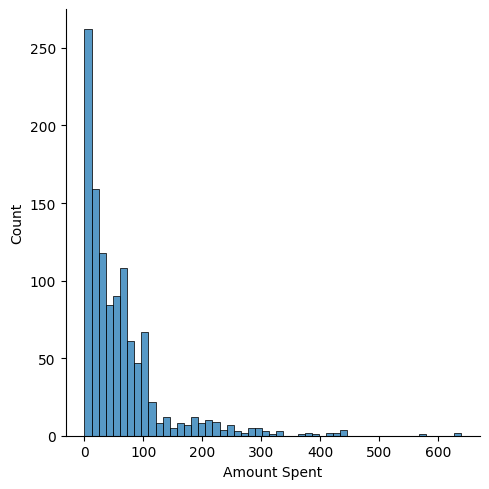

In [20]:

# Drop the rows where 'column_name' has a value of 0
df_spend = df[df['Amount Spent'] > 0]
sns.displot(x=df_spend['Amount Spent'])


1.2 Spending analysis on complete data

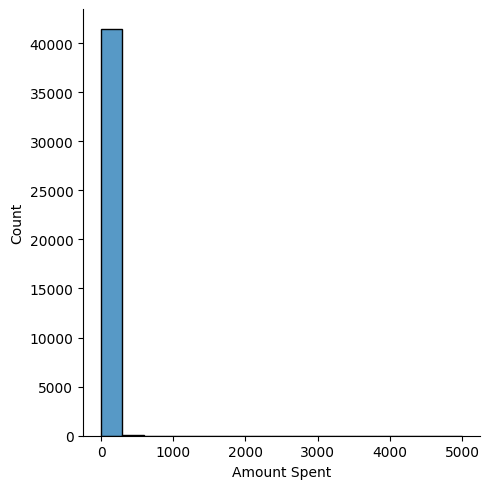

In [21]:
sns.displot(x=df_concat['Amount Spent'])

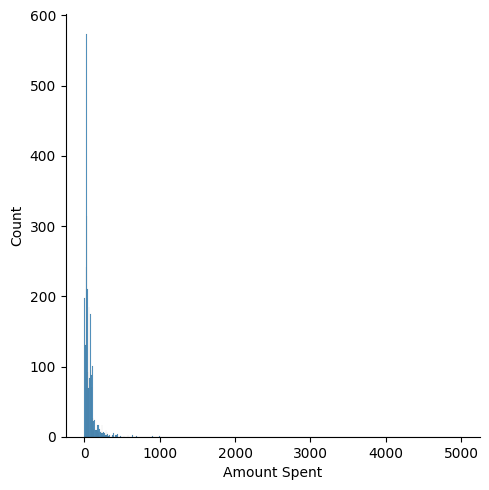

In [22]:
# Drop the rows where 'column_name' has a value of 0
df_concat_spend = df_concat[df_concat['Amount Spent'] > 0]
sns.displot(x=df_concat_spend['Amount Spent'])

In [23]:
df_concat_spend['Amount Spent'].describe()

count    2930.000000
mean       62.415348
std       115.133571
min         0.010000
25%        23.542500
50%        37.340000
75%        76.200000
max      5000.000000
Name: Amount Spent, dtype: float64

Most ads have a low spend

In [24]:
df_concat_spend['phase'].value_counts()

Awareness        1548
Consideration    1088
Decision          294
Name: phase, dtype: int64

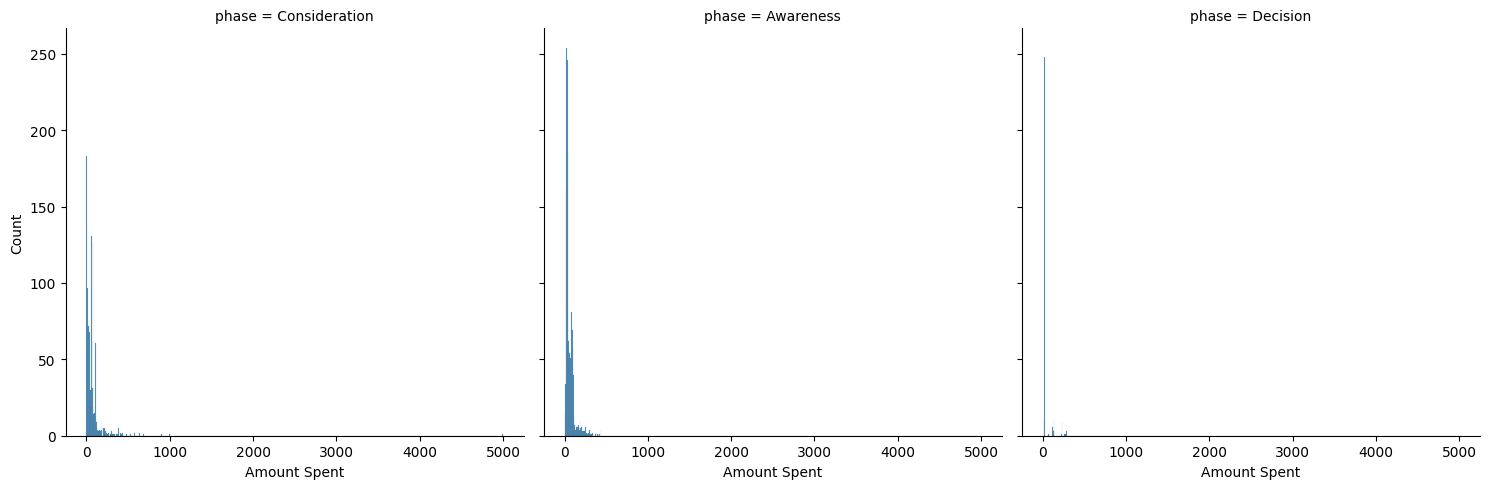

In [25]:
sns.displot(x=df_concat_spend['Amount Spent'], col=df_concat_spend['phase'])

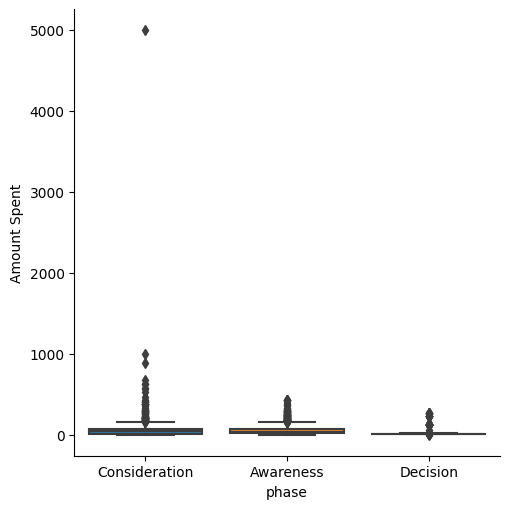

In [26]:
sns.catplot(x='phase', y='Amount Spent', data=df_concat_spend, kind='box')

Spend on awareness campaigns is higher than consideration-> CAP

2.1 Impressions analysis on sample data

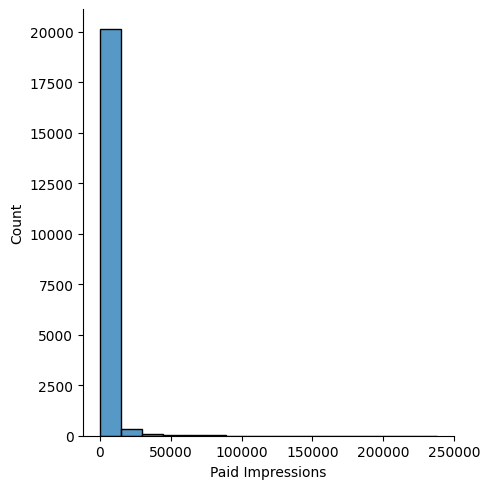

In [27]:
sns.displot(x=df['Paid Impressions'])

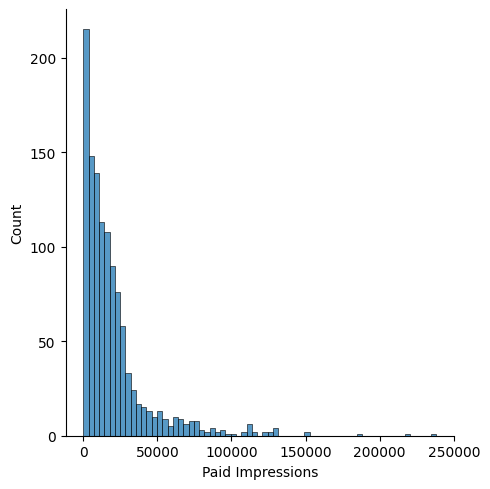

In [28]:
# Drop the rows where 'column_name' has a value of 0
df_impressions = df[df['Paid Impressions'] > 0]
sns.displot(x=df_impressions['Paid Impressions'])


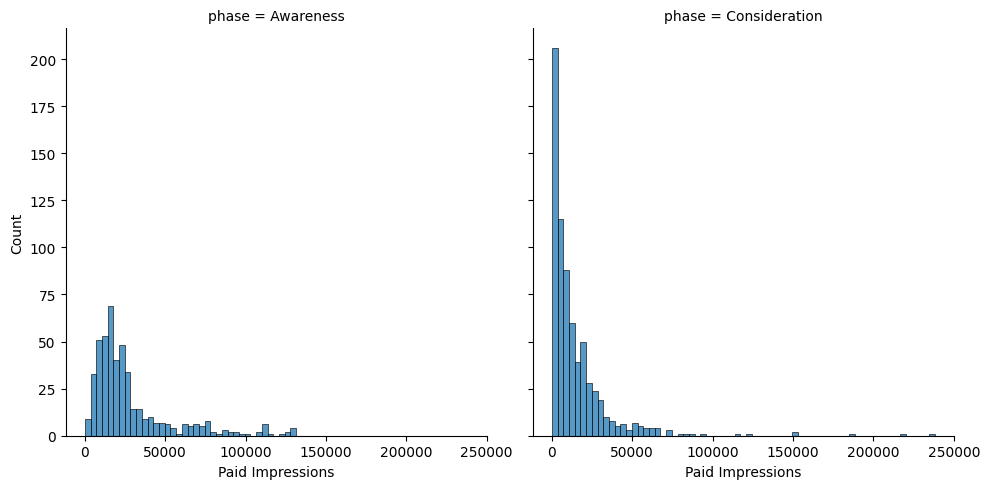

In [29]:
sns.displot(x=df_impressions['Paid Impressions'], col=df_impressions['phase'])

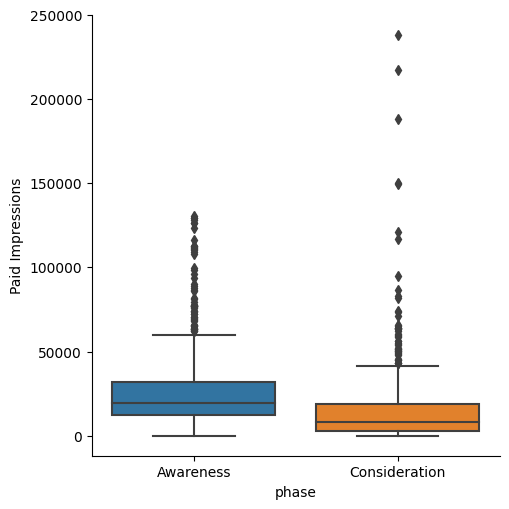

In [30]:
sns.catplot(x='phase', y='Paid Impressions', data=df_impressions, kind='box')

Awareness focused campaigns generate higher paid impressions than consideration

2.2 Impressions analysis on full data

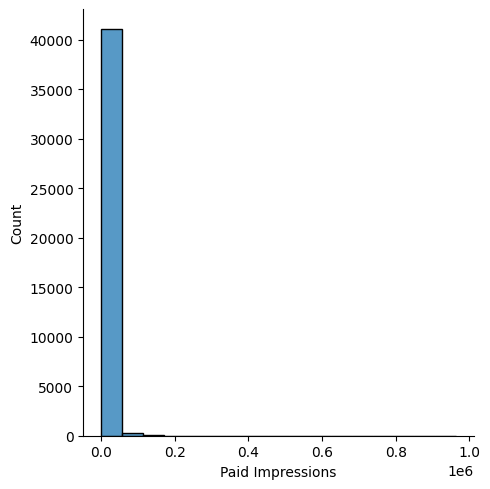

In [31]:
sns.displot(x=df_concat['Paid Impressions'])

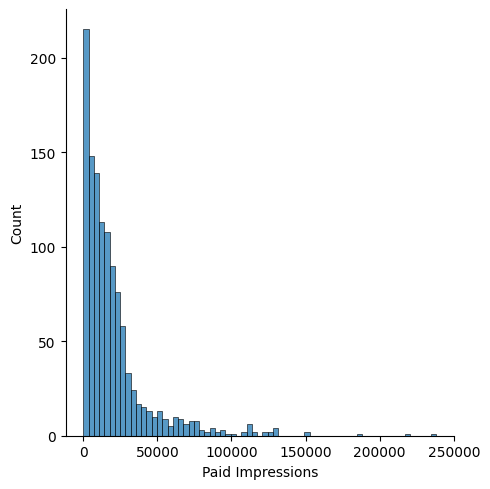

In [32]:
# Drop the rows where 'column_name' has a value of 0
df_concat_impressions = df_concat[df_concat['Paid Impressions'] > 0]
sns.displot(x=df_impressions['Paid Impressions'])

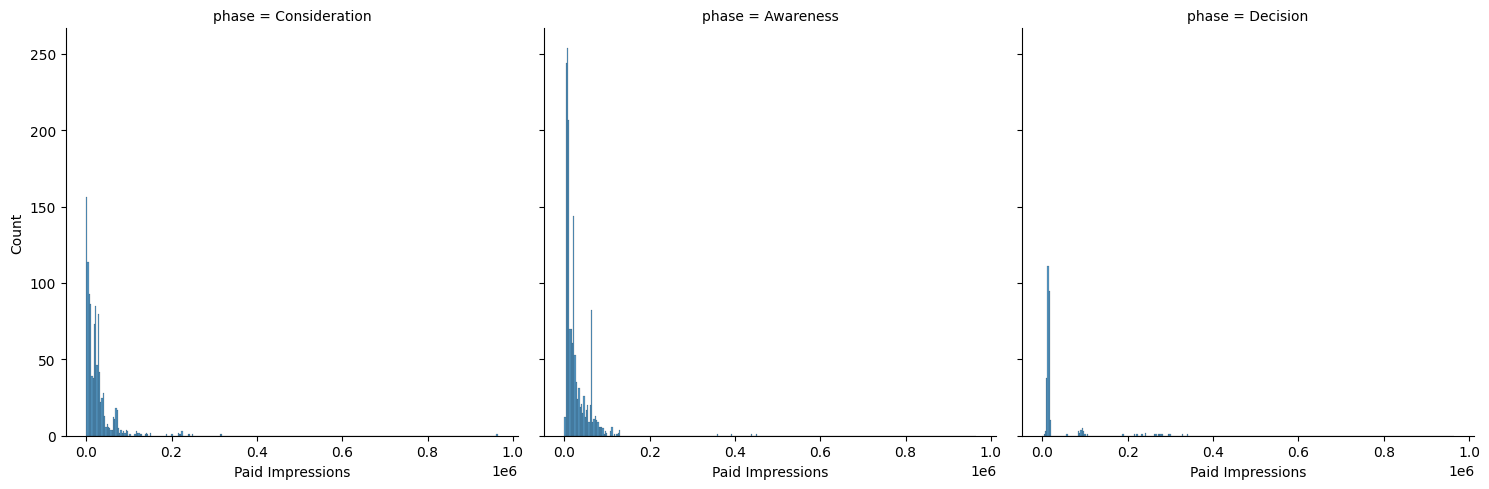

In [33]:
sns.displot(x=df_concat_impressions['Paid Impressions'], col=df_concat_impressions['phase'])

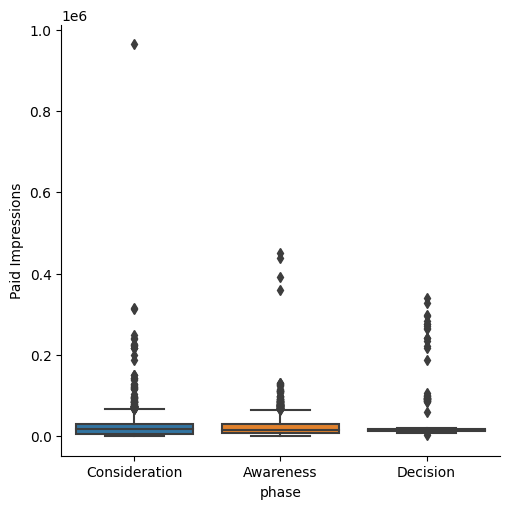

In [34]:
sns.catplot(x='phase', y='Paid Impressions', data=df_concat_impressions, kind='box')

No more obvious difference between impressions

3.1. Swipe Ups analysis on sample data

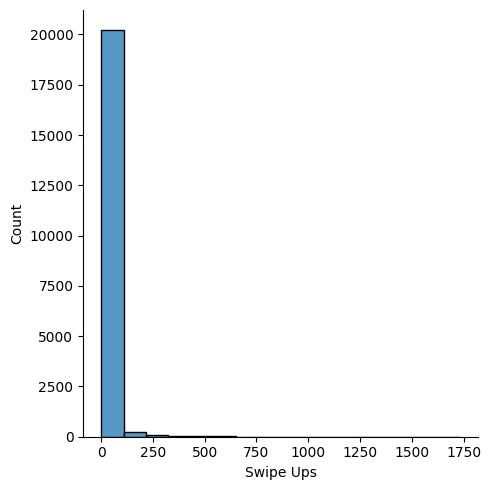

In [35]:
sns.displot(x=df['Swipe Ups'])

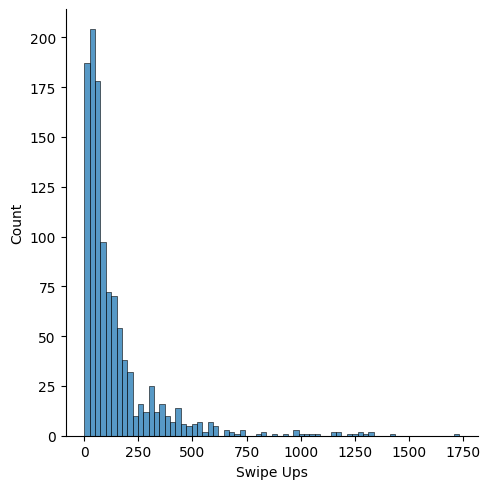

In [36]:
# Drop the rows where 'column_name' has a value of 0
df_swipeups = df[df['Swipe Ups'] > 0]
sns.displot(x=df_swipeups['Swipe Ups'])

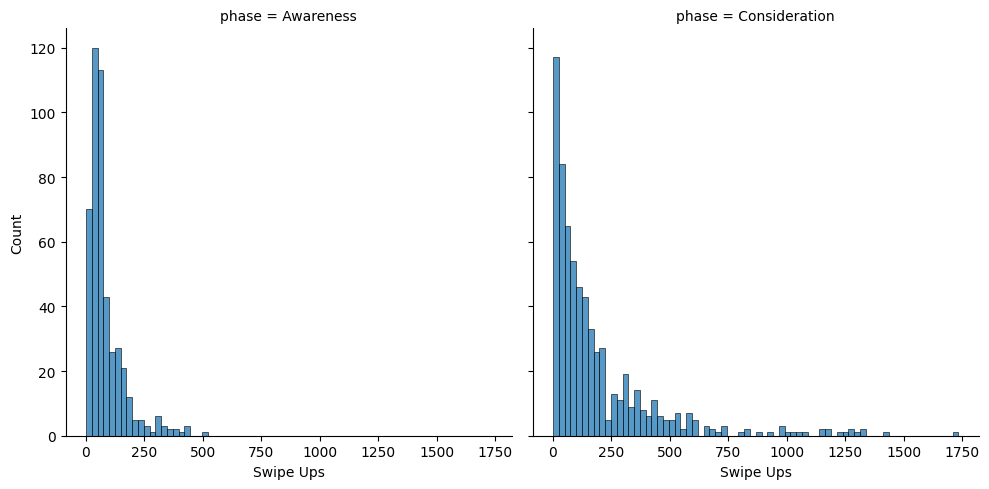

In [37]:
sns.displot(x=df_swipeups['Swipe Ups'], col=df_swipeups['phase'])

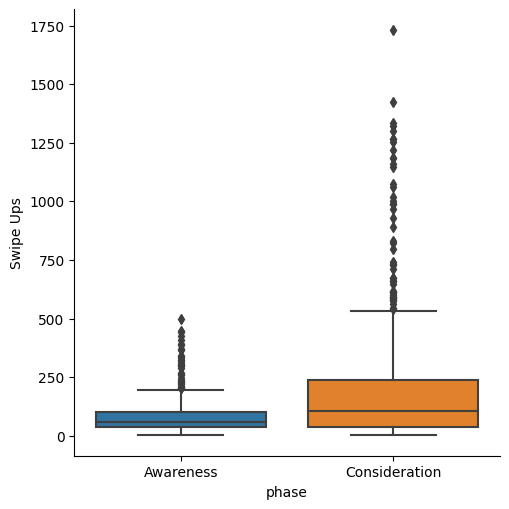

In [38]:
sns.catplot(x='phase', y='Swipe Ups', data=df_swipeups, kind='box')

2.2. Swipe ups analysis for full dataset

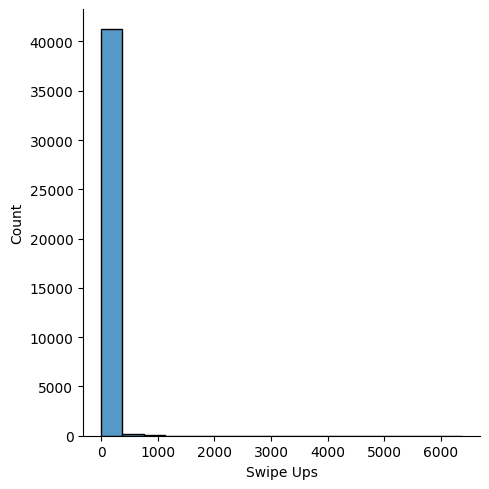

In [39]:
sns.displot(x=df_concat['Swipe Ups'])

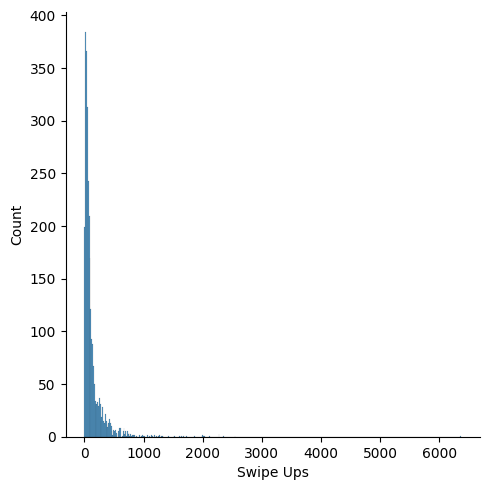

In [40]:
# Drop the rows where 'column_name' has a value of 0
df_concat_swipeups = df_concat[df_concat['Swipe Ups'] > 0]
sns.displot(x=df_concat_swipeups['Swipe Ups'])

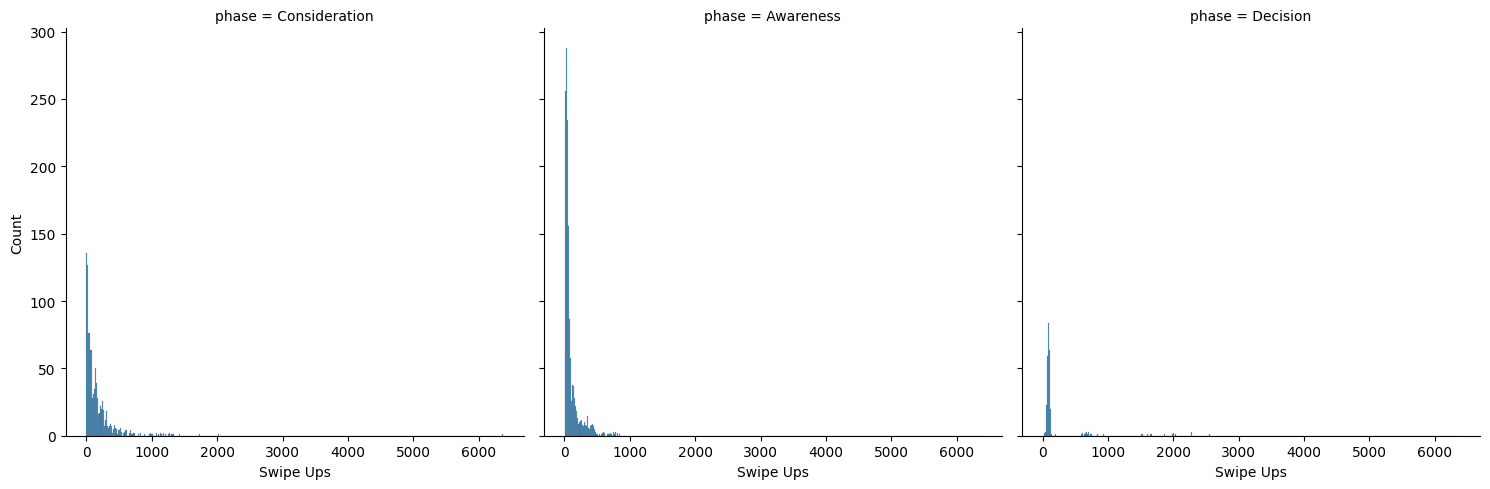

In [41]:
sns.displot(x=df_concat_swipeups['Swipe Ups'], col=df_concat_swipeups['phase'])

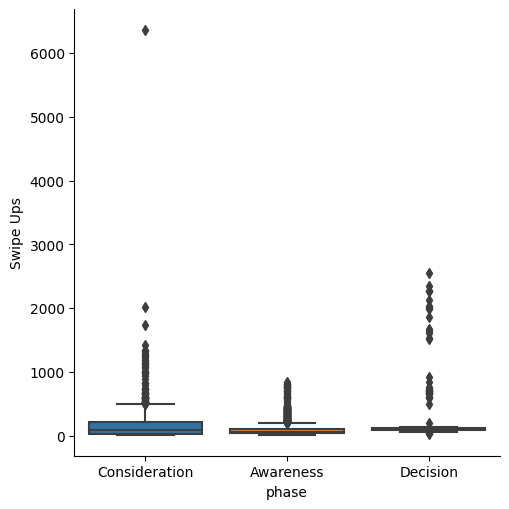

In [42]:
sns.catplot(x='phase', y='Swipe Ups', data=df_concat_swipeups, kind='box')

More swipe ups for consideration apparently!

Consideration campaigns perform better than awareness campaigns when it comes to swipe ups!

## Spend v Performance metric - sample data

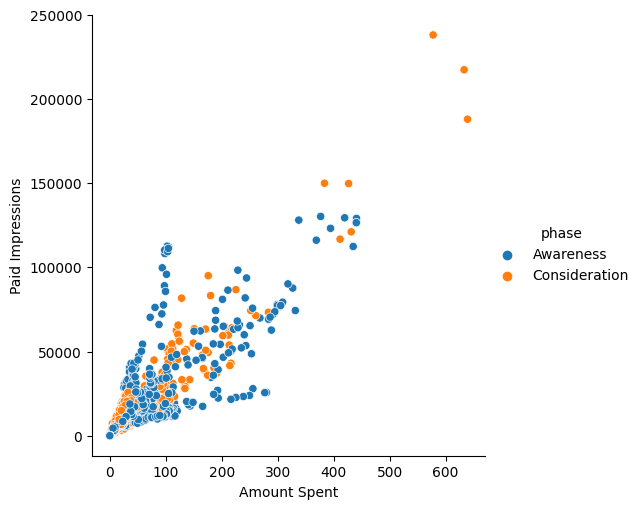

In [43]:
sns.relplot(x='Amount Spent', y='Paid Impressions', data=df, hue='phase', kind='scatter')

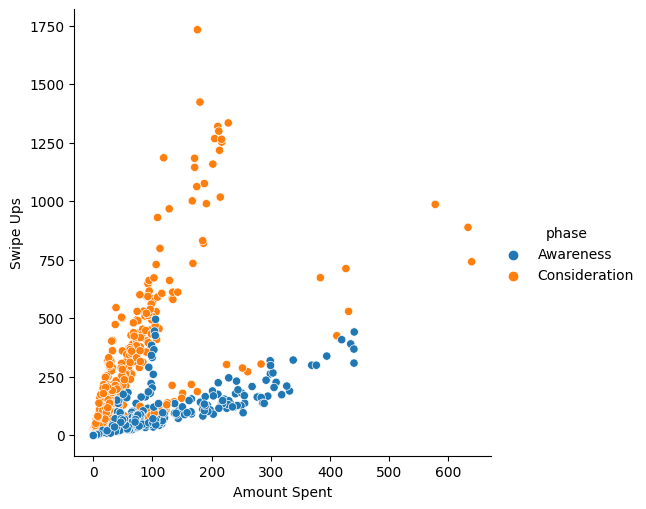

In [44]:
sns.relplot(x='Amount Spent', y='Swipe Ups', data=df, hue='phase', kind='scatter')

## Spend v Performance metric - full data

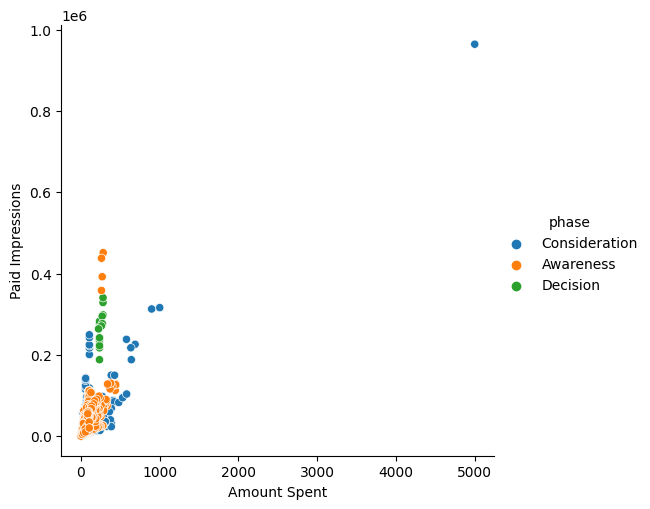

In [45]:
sns.relplot(x='Amount Spent', y='Paid Impressions', data=df_concat, hue='phase', kind='scatter')

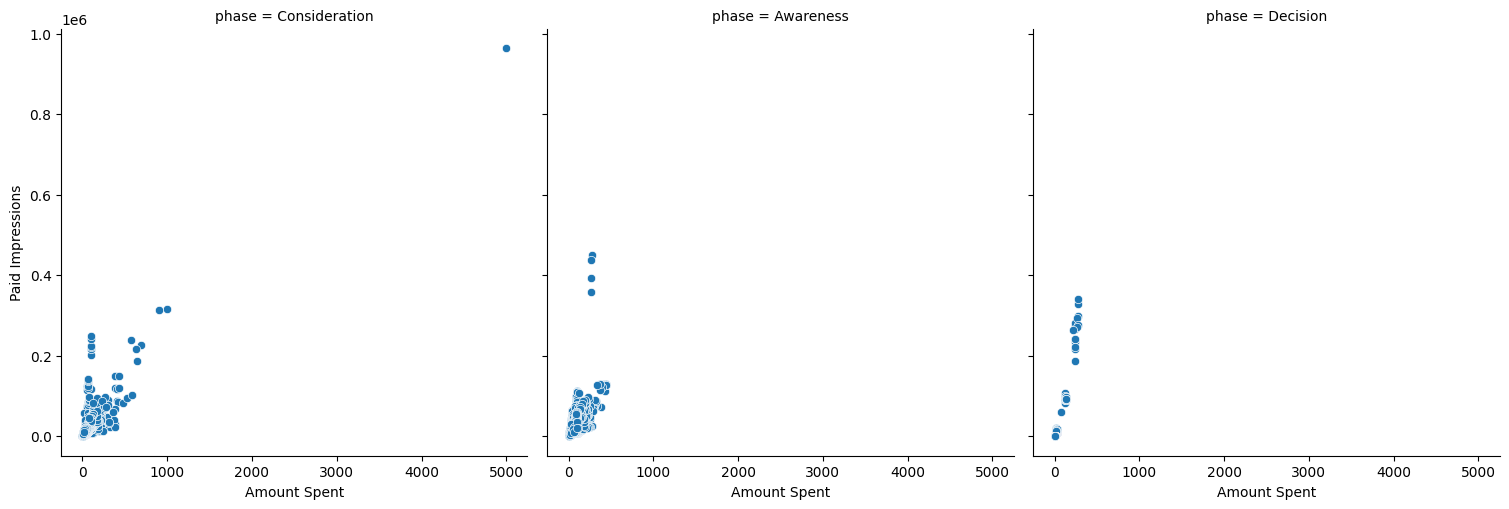

In [46]:
sns.relplot(x='Amount Spent', y='Paid Impressions', data=df_concat, col='phase', kind='scatter')

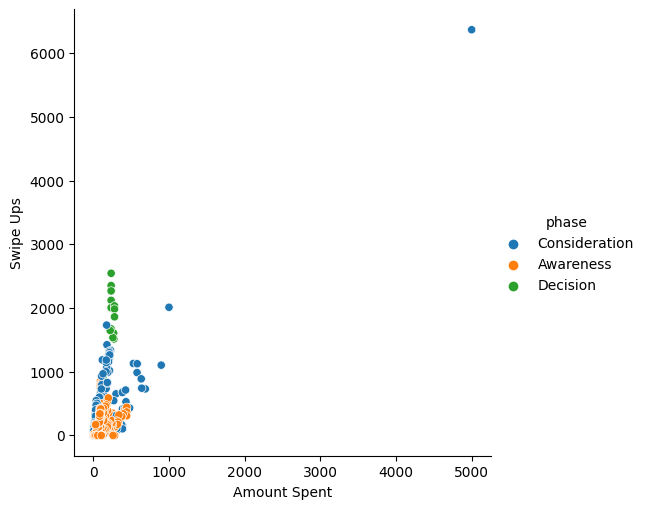

In [47]:
sns.relplot(x='Amount Spent', y='Swipe Ups', data=df_concat, hue='phase', kind='scatter')

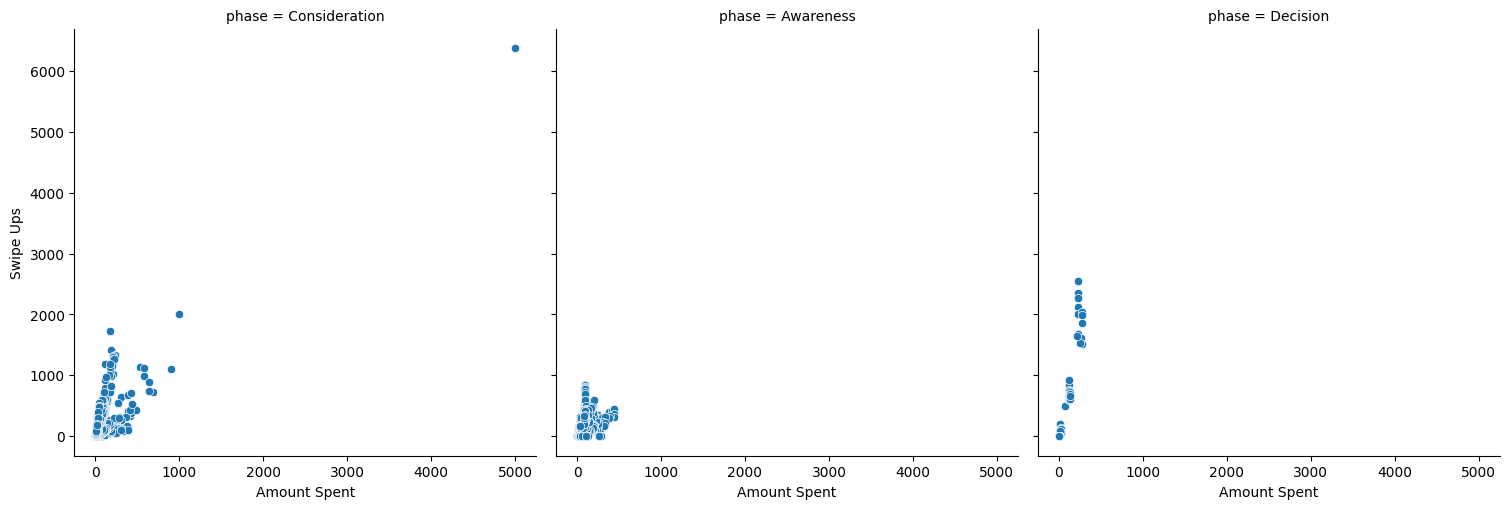

In [48]:
sns.relplot(x='Amount Spent', y='Swipe Ups', data=df_concat, col='phase', kind='scatter')

## Weekly analysis

In [49]:
df

,Campaign Id,Campaign Name,Ad Set Id,Ad Set Name,Creative Id,Ad Id,Ad Name,Ad Active Status,Ad Type,Amount Spent,...,Paid Reach,Swipe Up Rate,2 Second Video Views,Video Plays at 25%,Video Plays at 50%,Video Plays at 75%,Video Completions,Model,date,phase
0,6123984a-055f-4fcf-b532-3b9b121b8f9c,PSGC_OVS_MMK_STD-RNG-EQE_AWRN_AOB_B.C.2022.EQE...,ead30250-2c1a-4ffa-a052-477d3f3232de,Snapchat_VIEWS_2SECV_LPRM_BEHVR+INT_SCAP_DXB_EN,dfb8447e-7425-4eb9-b712-04d9e2713096,3ae22072-43ef-430b-8c5b-b7416b55966e,Video_EQE with VO_DXB_EN,Active,Web View,0.0,...,0,0.0,0,0,0,0,0,EQE,2022-01-01,Awareness
1,6123984a-055f-4fcf-b532-3b9b121b8f9c,PSGC_OVS_MMK_STD-RNG-EQE_AWRN_AOB_B.C.2022.EQE...,ead30250-2c1a-4ffa-a052-477d3f3232de,Snapchat_VIEWS_2SECV_LPRM_BEHVR+INT_SCAP_DXB_EN,dfb8447e-7425-4eb9-b712-04d9e2713096,3ae22072-43ef-430b-8c5b-b7416b55966e,Video_EQE with VO_DXB_EN,Active,Web View,0.0,...,0,0.0,0,0,0,0,0,EQE,2022-01-02,Awareness
2,6123984a-055f-4fcf-b532-3b9b121b8f9c,PSGC_OVS_MMK_STD-RNG-EQE_AWRN_AOB_B.C.2022.EQE...,ead30250-2c1a-4ffa-a052-477d3f3232de,Snapchat_VIEWS_2SECV_LPRM_BEHVR+INT_SCAP_DXB_EN,dfb8447e-7425-4eb9-b712-04d9e2713096,3ae22072-43ef-430b-8c5b-b7416b55966e,Video_EQE with VO_DXB_EN,Active,Web View,0.0,...,0,0.0,0,0,0,0,0,EQE,2022-01-03,Awareness
3,6123984a-055f-4fcf-b532-3b9b121b8f9c,PSGC_OVS_MMK_STD-RNG-EQE_AWRN_AOB_B.C.2022.EQE...,ead30250-2c1a-4ffa-a052-477d3f3232de,Snapchat_VIEWS_2SECV_LPRM_BEHVR+INT_SCAP_DXB_EN,dfb8447e-7425-4eb9-b712-04d9e2713096,3ae22072-43ef-430b-8c5b-b7416b55966e,Video_EQE with VO_DXB_EN,Active,Web View,0.0,...,0,0.0,0,0,0,0,0,EQE,2022-01-04,Awareness
4,6123984a-055f-4fcf-b532-3b9b121b8f9c,PSGC_OVS_MMK_STD-RNG-EQE_AWRN_AOB_B.C.2022.EQE...,ead30250-2c1a-4ffa-a052-477d3f3232de,Snapchat_VIEWS_2SECV_LPRM_BEHVR+INT_SCAP_DXB_EN,dfb8447e-7425-4eb9-b712-04d9e2713096,3ae22072-43ef-430b-8c5b-b7416b55966e,Video_EQE with VO_DXB_EN,Active,Web View,0.0,...,0,0.0,0,0,0,0,0,EQE,2022-01-05,Awareness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20633,748fcbb9-576d-49cd-81b2-ca6c03b167ce,PSGC_OVS_KWT_RNG_AWRN_LTC_P.C.SL.T_Snapchat_EN...,dcfd25ed-b0b7-4bef-bd18-c4b36a46467f,Snapchat_VIEWS_2SECV_LPRM_BEHVR+INT_SCAP_KWT_AR,267b22f2-af71-4767-9baa-c6f32f81267f,ec729cef-53c7-41d0-ab2f-3e30f01bce4b,VIDEO_AMG GT 4 Door_KWT_AR,Active,Web View,0.0,...,0,0.0,0,0,0,0,0,AMG SL,2022-12-27,Awareness
20634,748fcbb9-576d-49cd-81b2-ca6c03b167ce,PSGC_OVS_KWT_RNG_AWRN_LTC_P.C.SL.T_Snapchat_EN...,dcfd25ed-b0b7-4bef-bd18-c4b36a46467f,Snapchat_VIEWS_2SECV_LPRM_BEHVR+INT_SCAP_KWT_AR,267b22f2-af71-4767-9baa-c6f32f81267f,ec729cef-53c7-41d0-ab2f-3e30f01bce4b,VIDEO_AMG GT 4 Door_KWT_AR,Active,Web View,0.0,...,0,0.0,0,0,0,0,0,AMG SL,2022-12-28,Awareness
20635,748fcbb9-576d-49cd-81b2-ca6c03b167ce,PSGC_OVS_KWT_RNG_AWRN_LTC_P.C.SL.T_Snapchat_EN...,dcfd25ed-b0b7-4bef-bd18-c4b36a46467f,Snapchat_VIEWS_2SECV_LPRM_BEHVR+INT_SCAP_KWT_AR,267b22f2-af71-4767-9baa-c6f32f81267f,ec729cef-53c7-41d0-ab2f-3e30f01bce4b,VIDEO_AMG GT 4 Door_KWT_AR,Active,Web View,0.0,...,0,0.0,0,0,0,0,0,AMG SL,2022-12-29,Awareness
20636,748fcbb9-576d-49cd-81b2-ca6c03b167ce,PSGC_OVS_KWT_RNG_AWRN_LTC_P.C.SL.T_Snapchat_EN...,dcfd25ed-b0b7-4bef-bd18-c4b36a46467f,Snapchat_VIEWS_2SECV_LPRM_BEHVR+INT_SCAP_KWT_AR,267b22f2-af71-4767-9baa-c6f32f81267f,ec729cef-53c7-41d0-ab2f-3e30f01bce4b,VIDEO_AMG GT 4 Door_KWT_AR,Active,Web View,0.0,...,0,0.0,0,0,0,0,0,AMG SL,2022-12-30,Awareness


In [50]:
# Group the sample data by week and calculate the sum of the ad metrics
df_weekly = df.groupby(pd.Grouper(key='date', freq='W-SUN')).sum()

# Reset the index to get the 'week' column
df_weekly = df_weekly.reset_index()

# Rename the 'date' column to 'week'
df_weekly = df_weekly.rename(columns={'date': 'week_end'})

# Add a 'week_number' column ranging from 1 to 52
df_weekly['week_number'] = df_weekly['week_end'].dt.week

# Display the transformed weekly dataset
df_weekly

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_53708/1645630394.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly = df.groupby(pd.Grouper(key='date', freq='W-SUN')).sum()
/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_53708/1645630394.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_weekly['week_number'] = df_weekly['week_end'].dt.week


,week_end,Amount Spent,Paid Impressions,Swipe Ups,Paid Reach,Swipe Up Rate,2 Second Video Views,Video Plays at 25%,Video Plays at 50%,Video Plays at 75%,Video Completions,week_number
0,2022-01-02,0.67,246,3,246,0.0495,22,13,6,4,3,52
1,2022-01-09,0.00,0,0,0,0.0000,0,0,0,0,0,1
2,2022-01-16,0.00,0,0,0,0.0000,0,0,0,0,0,2
3,2022-01-23,0.00,0,0,0,0.0000,0,0,0,0,0,3
4,2022-01-30,0.00,0,0,0,0.0000,0,0,0,0,0,4
5,2022-02-06,0.00,0,0,0,0.0000,0,0,0,0,0,5
6,2022-02-13,0.00,0,0,0,0.0000,0,0,0,0,0,6
7,2022-02-20,0.00,0,0,0,0.0000,0,0,0,0,0,7
8,2022-02-27,0.00,0,0,0,0.0000,0,0,0,0,0,8
9,2022-03-06,0.00,0,0,0,0.0000,0,0,0,0,0,9


In [51]:
# Group the full data by week and calculate the sum of the ad metrics
df_concat_weekly = df_concat.groupby(pd.Grouper(key='date', freq='W-SUN')).sum()

# Reset the index to get the 'week' column
df_concat_weekly = df_concat_weekly.reset_index()

# Rename the 'date' column to 'week'
df_concat_weekly = df_concat_weekly.rename(columns={'date': 'week_end'})

# Add a 'week_number' column ranging from 1 to 52
df_concat_weekly['week_number'] = df_concat_weekly['week_end'].dt.week

# Display the transformed weekly dataset
df_concat_weekly

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_53708/2602263729.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_concat_weekly = df_concat.groupby(pd.Grouper(key='date', freq='W-SUN')).sum()
/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_53708/2602263729.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_concat_weekly['week_number'] = df_concat_weekly['week_end'].dt.week


,week_end,Amount Spent,Paid Impressions,Swipe Ups,week_number
0,2020-01-05,0.00,0,0,1
1,2020-01-12,0.00,0,0,2
2,2020-01-19,0.00,0,0,3
3,2020-01-26,0.00,0,0,4
4,2020-02-02,0.00,0,0,5
...,...,...,...,...,...
178,2023-06-04,1010.13,567821,3406,22
179,2023-06-11,0.00,0,0,23
180,2023-06-18,0.00,0,0,24
181,2023-06-25,0.00,0,0,25


/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_53708/937001669.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


NameError: name 'k' is not defined

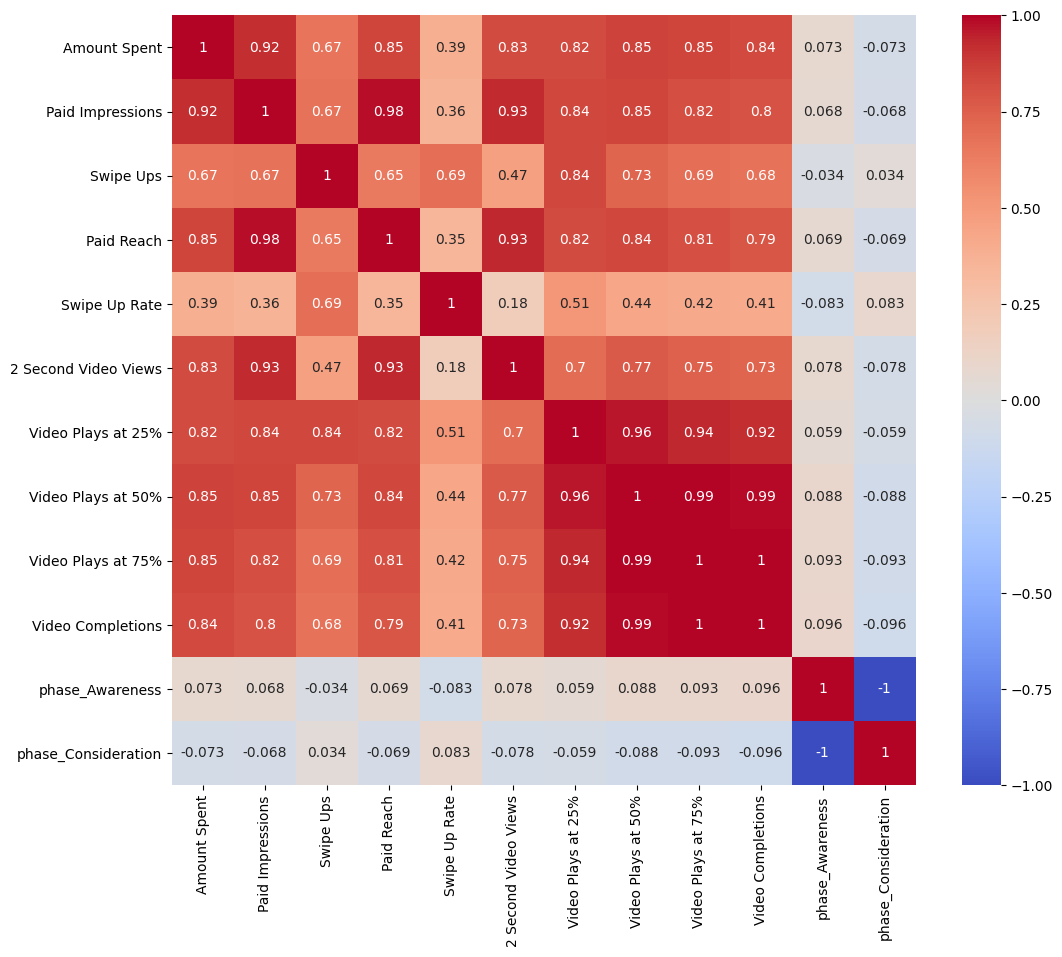

In [52]:
phases= pd.get_dummies(df['phase'], prefix='phase')
df= pd.concat([df, phases], axis=1)

correlation_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Top {} Features)'.format(k))
plt.show()

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_53708/1355331431.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


NameError: name 'k' is not defined

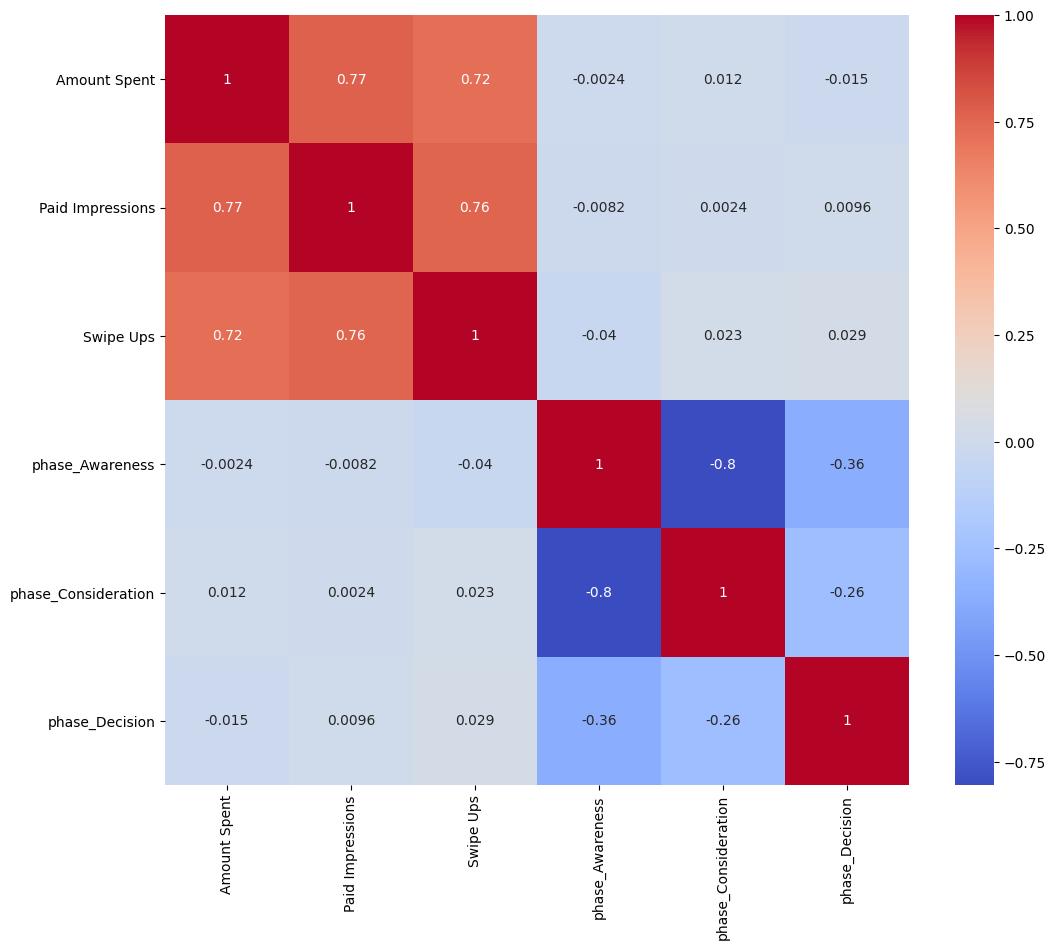

In [53]:
phases_concat= pd.get_dummies(df_concat['phase'], prefix='phase')
df= pd.concat([df_concat, phases_concat], axis=1)

correlation_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Top {} Features)'.format(k))
plt.show()

## Plot according to time

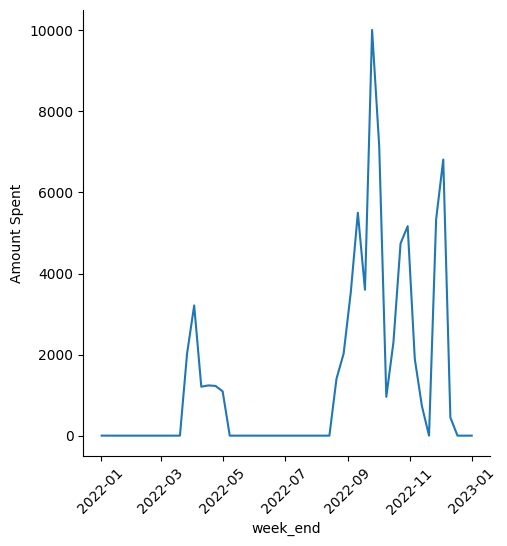

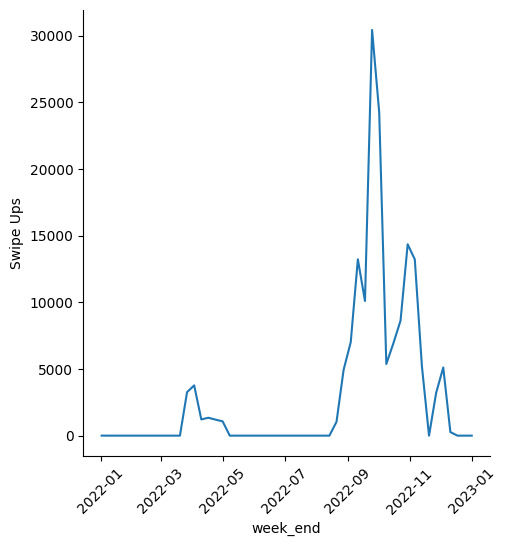

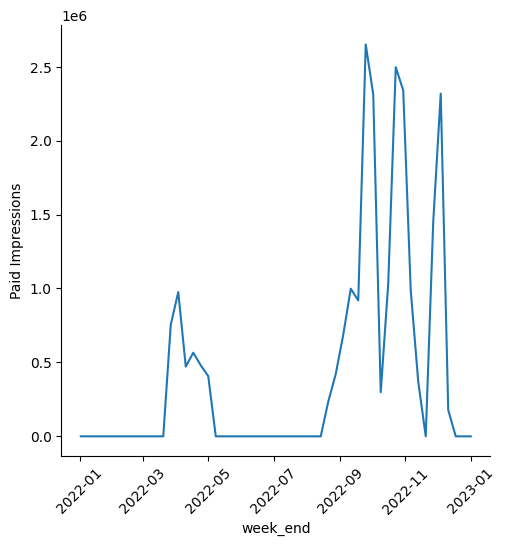

In [54]:
columns=['Amount Spent', 'Swipe Ups', 'Paid Impressions']

for c in columns:
    sns.relplot(x='week_end', y=c, data=df_weekly, kind='line')
    plt.xticks(rotation=45)
    plt.show()


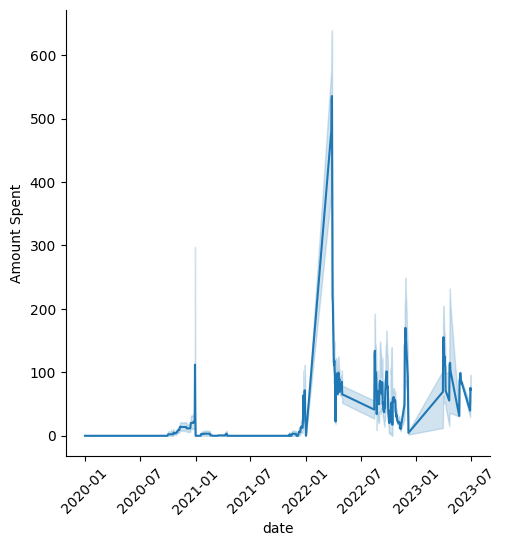

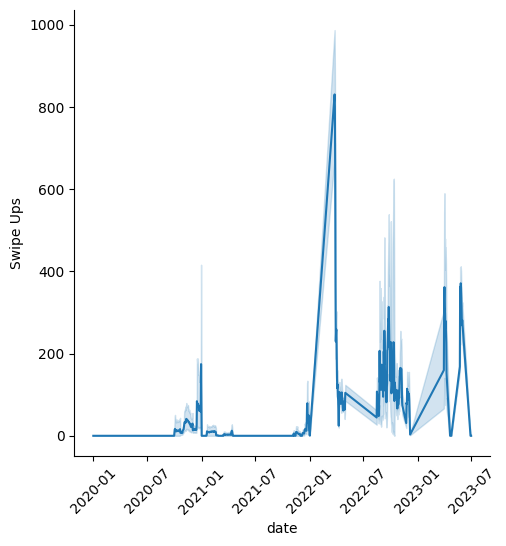

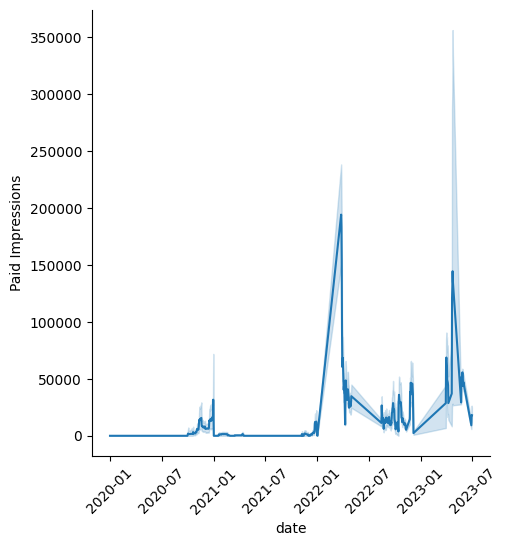

In [55]:
columns=['Amount Spent', 'Swipe Ups', 'Paid Impressions']

for c in columns:
    sns.relplot(x='date', y=c, data=df, kind='line')
    plt.xticks(rotation=45)
    plt.show()


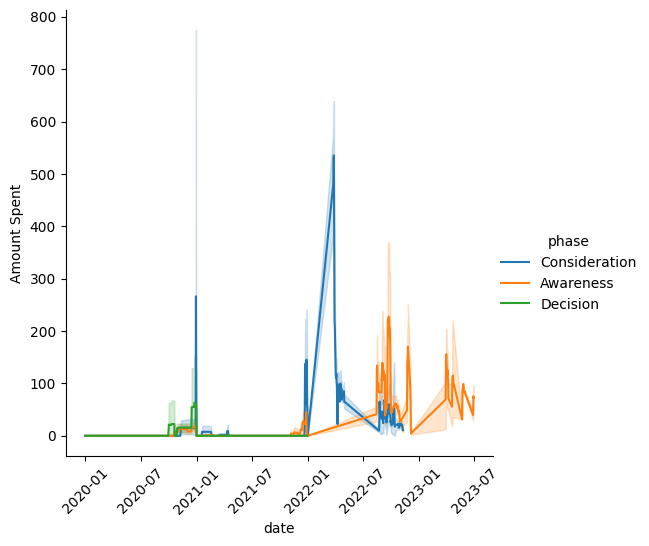

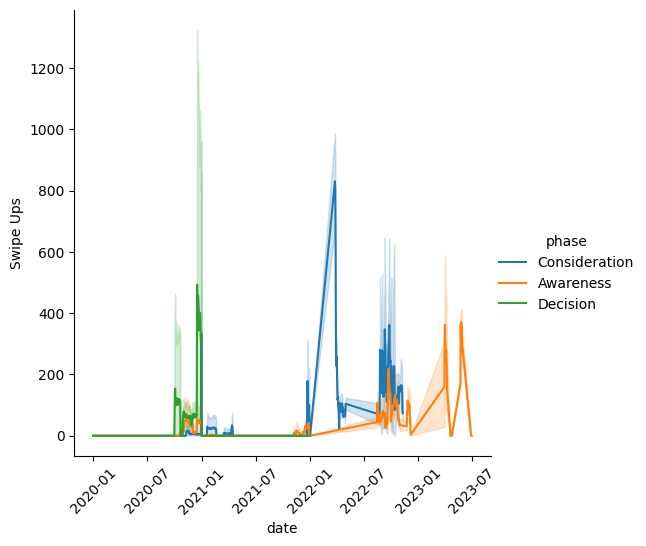

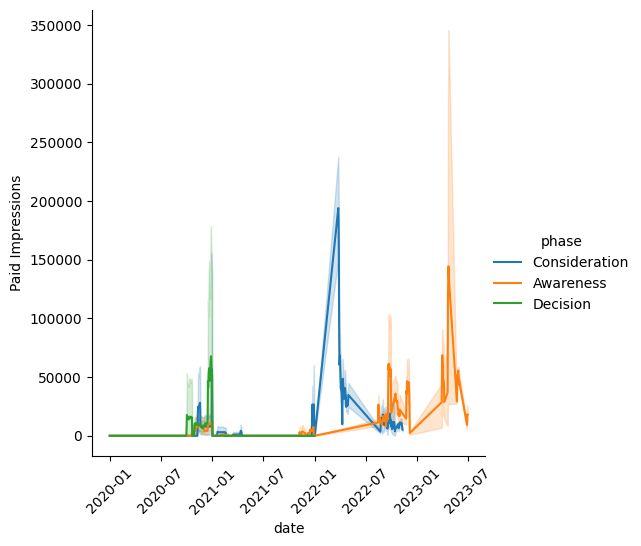

In [56]:
columns=['Amount Spent', 'Swipe Ups', 'Paid Impressions']

for c in columns:
    sns.relplot(x='date', y=c, data=df, kind='line', hue='phase')
    plt.xticks(rotation=45)
    plt.show()

## Plot according to time full data

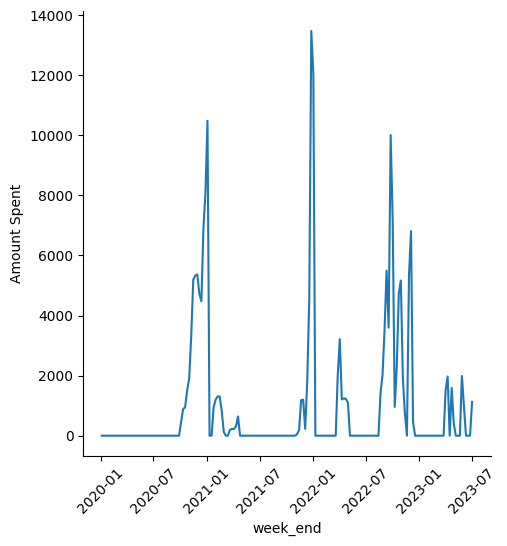

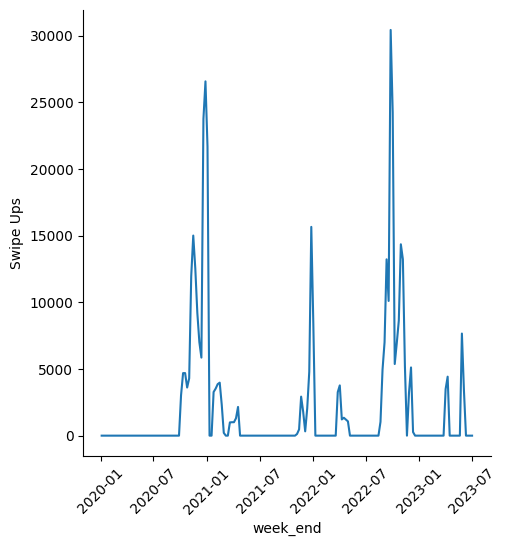

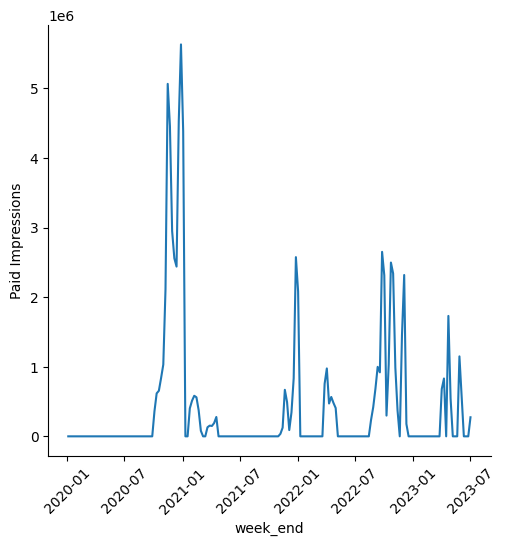

In [57]:
columns=['Amount Spent', 'Swipe Ups', 'Paid Impressions']

for c in columns:
    sns.relplot(x='week_end', y=c, data=df_concat_weekly, kind='line')
    plt.xticks(rotation=45)
    plt.show()


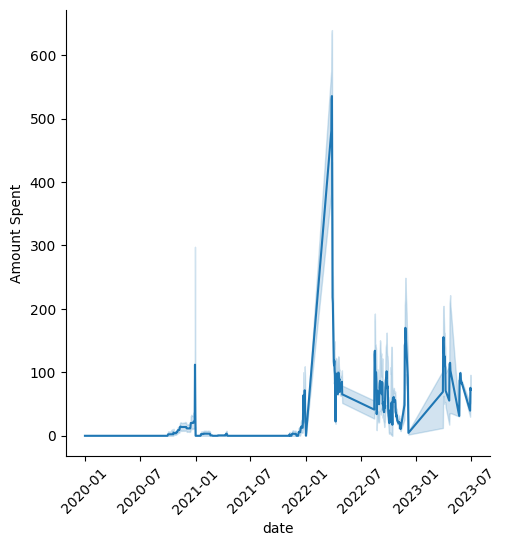

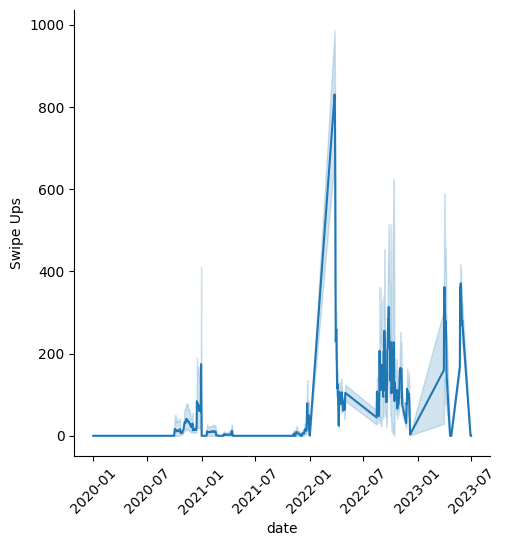

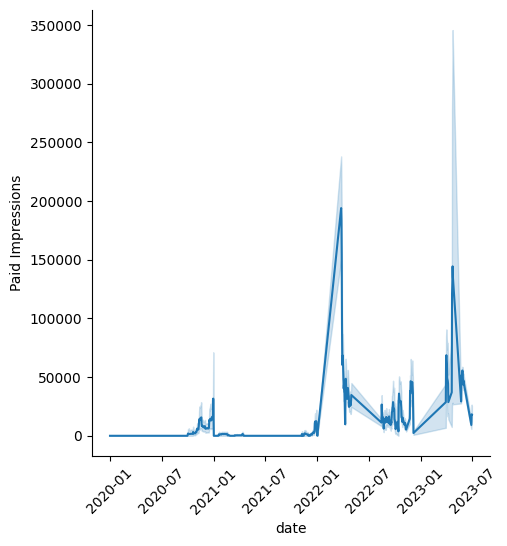

In [58]:
columns=['Amount Spent', 'Swipe Ups', 'Paid Impressions']

for c in columns:
    sns.relplot(x='date', y=c, data=df_concat, kind='line')
    plt.xticks(rotation=45)
    plt.show()

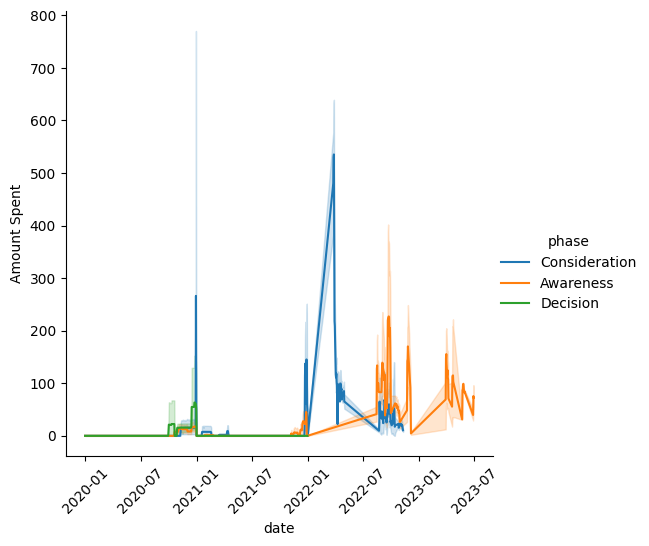

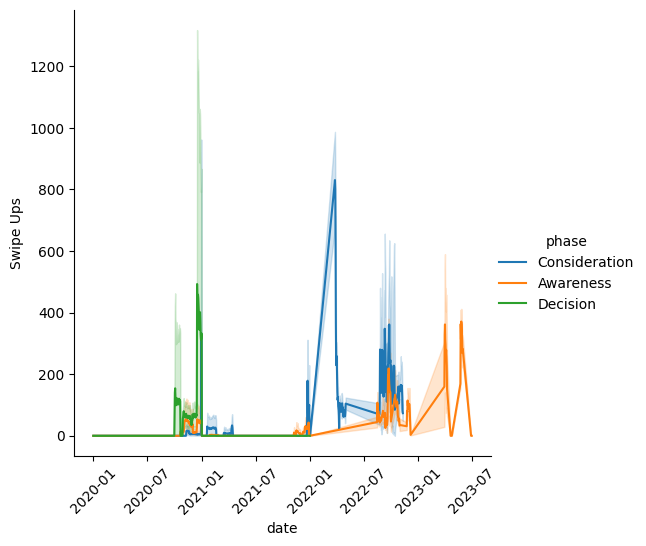

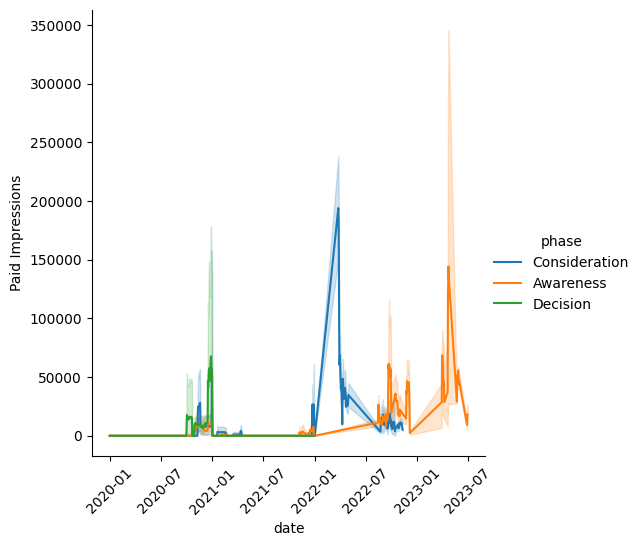

In [59]:
columns=['Amount Spent', 'Swipe Ups', 'Paid Impressions']

for c in columns:
    sns.relplot(x='date', y=c, data=df_concat, kind='line', hue='phase')
    plt.xticks(rotation=45)
    plt.show()

In [60]:
df_final=df_concat_weekly.rename(columns={'Amount Spent': 'spend_snapchat', 'Paid Impressions': 'snapchat_impressions', 'Swipe Ups': 'snapchat_clicks'}, )

In [61]:
df_final

,week_end,spend_snapchat,snapchat_impressions,snapchat_clicks,week_number
0,2020-01-05,0.00,0,0,1
1,2020-01-12,0.00,0,0,2
2,2020-01-19,0.00,0,0,3
3,2020-01-26,0.00,0,0,4
4,2020-02-02,0.00,0,0,5
...,...,...,...,...,...
178,2023-06-04,1010.13,567821,3406,22
179,2023-06-11,0.00,0,0,23
180,2023-06-18,0.00,0,0,24
181,2023-06-25,0.00,0,0,25


In [62]:
df_final.to_csv('snapchat_final.csv')